# Part I - Prosper Loan Data Exploration 
## by (Aly Abdelkader)

## Introduction
>Our objective in this project is to perform an exploratory and explicative visual analysis of the prosper loan dataset. We aim at finding out what factors affect a BorrowerAPR and what affects the borrower’s interest rate (BorrowerRate). This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and more.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')


In [4]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)


(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


### Visual assessment

In [5]:
#randomely check 5 samples of the dataset
df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
102708,41783527972778879B79251,531194,2011-10-07 09:56:40.923000000,NaN,36,Current,NaN,0.35643,0.3199,0.3099,...,-97.04,-222.11,0.0,0.0,0.0,1.0,0,0,0.0,151
45272,A2F8336537760122138C367,28310,2006-08-01 21:03:10.367000000,E,36,Completed,2008-02-20 00:00:00,0.24148,0.2321,0.2146,...,-12.47,0.00,0.0,0.0,0.0,1.0,0,0,0.0,39
22327,A56D3509629351874223D3D,495808,2011-02-26 11:09:09.393000000,NaN,36,Completed,2013-04-24 00:00:00,0.22872,0.1949,0.1849,...,-109.98,0.00,0.0,0.0,0.0,1.0,0,0,0.0,137
54063,6EE13386680712512AA22B2,125208,2007-04-18 04:08:29.917000000,D,36,Completed,2010-05-03 00:00:00,0.17813,0.1600,0.1500,...,-16.67,0.00,0.0,0.0,0.0,1.0,0,0,0.0,39
24823,62D43590462042585D2C75F,929438,2013-09-24 18:37:18.850000000,NaN,36,Current,NaN,0.13301,0.1050,0.0950,...,-7.99,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1


### Programmatic assessement

In [197]:
#Checking the data type and possible missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [198]:
#Check for unique value of EmploymentStatus and ListingCategory
print(df['EmploymentStatus'].unique())
print(df['ListingCategory (numeric)'].unique())

['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']
[ 0  2 16  1  7 13  6 15 20 19  3 18  8  4 11 14  5  9 17 10 12]


##### Quality issue #1: ListingCreationDate, ClosedDate are not in proper data type 

##### Quality issue #2:  ListingCategory should contains the value directly eg: Business instead of 3. The column name should also be modify

##### Quality issue #3:  EmploymentStatus is not in proper data type 

In [199]:
#Summary statistic of numeric variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


We can oberserve that the mean length of the loan expressed in months is around 40 months and the maximum borrower's rate is 0.49 while the mean is 0.218

In [200]:
#Checking for null values
df.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

We have a lot of Null values linked to various features, some which are of interest to our analysis and some which are not.

##### Quality issue #4: The dataset contains too much null values

In [201]:
#Checking for duplicates
df.duplicated().sum()

0

As we can see, our dataset has no duplicates

##### Tidiness Issue #1: The dataset contains 81 features many of which we are not interested by.

##### Tidiness Issue #2: The Credit score is splited in CreditScoreRangeUpper and CreditScoreRangeLower. From the search on the web, Credit score is among the important factors of a loan.

### Cleaning

In [202]:
#Copy the original dataset
df_clean = df.copy()

#### Definition #1: Convert ListingCreationDate, ClosedDate to date time format. 

#### Code

In [203]:
#convert "ListingCreationDate", "ClosedDate" to date time with apply method
df_clean[["ListingCreationDate", "ClosedDate"]] = df[["ListingCreationDate", "ClosedDate"]].apply(pd.to_datetime)


#### Testing

In [204]:
df_clean[["ListingCreationDate", "ClosedDate"]].dtypes

ListingCreationDate    datetime64[ns]
ClosedDate             datetime64[ns]
dtype: object

#### Definition #2 & #3: Modify ListingCategory column name and assign direct String object value, convert it and Employment Status to category data type

#### Code

In [205]:
#Rename the ListingCategory (numeric) to ListingCategory
df_clean.rename(columns={"ListingCategory (numeric)":"ListingCategory"}, inplace=True)

In [206]:
#Check for unique value
df_clean['ListingCategory'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12])

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [207]:
# Checking for Null value on ListingCategory
df_clean['ListingCategory'].isna().sum()

0

In [208]:
class  ListingSwitch:
    """Class to switch through all cases and return the corresponding category based on the numeric value"""
    def GetListing(self, listingnum):
        """Takes in an interger corresponding to the Liting number and return the corresponding category in string"""

        default = "Not Available"

        return getattr(self, 'Listing_' + str(listingnum), lambda: default)()

    def Listing_1(self):
        return "Debt Consolidation"
    def Listing_2(self):
        return "Home Improvement"
    def Listing_3(self):
        return "Business"
    def Listing_4(self):
        return "Personal Loan"
    def Listing_5(self):
        return "Student Use"
    def Listing_6(self):
        return "Auto"
    def Listing_7(self):
        return "Other"
    def Listing_8(self):
        return "Baby&Adoption"
    def Listing_9(self):
        return "Boat"
    def Listing_10(self):
        return "Cosmetic Procedure"
    def Listing_11(self):
        return "Engagement Ring"
    def Listing_12(self):
        return "Green Loans"
    def Listing_13(self):
        return "Household Expenses"
    def Listing_14(self):
        return "Large Purchases"
    def Listing_15(self):
        return "Medical/Dental"
    def Listing_16(self):
        return "Motorcycle"
    def Listing_17(self):
        return "RV"
    def Listing_18(self):
        return "Taxes"
    def Listing_19(self):
        return "Vacation"
    def Listing_20(self):
        return "Wedding Loans"


In [209]:
#First convert Listing category to string to assigne the direct value
df_clean['ListingCategory'] = df_clean.ListingCategory.astype('str')

In [210]:
#Loop through each row and assigne the corresponding category
my_switch =  ListingSwitch()

for index, row in df_clean.iterrows():
    df_clean.at[index,'ListingCategory']=my_switch.GetListing(row['ListingCategory']) 

In [211]:
#Convert EmploymentStatus and ListingCategory into categorical data type
df_clean["EmploymentStatus"] = df["EmploymentStatus"].astype('category')



In [212]:
df_clean['ListingCategory]'] = df_clean.ListingCategory.astype('category')

#### Testing

In [213]:
df_clean[["ListingCategory", "EmploymentStatus"]].dtypes

ListingCategory       object
EmploymentStatus    category
dtype: object

In [214]:
#Check for unique value
df_clean['ListingCategory'].unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

#### Definition #4: Join CreditScoreRangeLower and CreditScoreRangeUpper in one column  named CreditScore Average by taking the average of the two columns

#### Code

In [215]:
df_clean['CreditScoreAvg']= (df_clean['CreditScoreRangeLower'] + df_clean['CreditScoreRangeUpper'])/2


#### Test

In [216]:
df_clean['CreditScoreAvg']

0         649.5
1         689.5
2         489.5
3         809.5
4         689.5
5         749.5
6         689.5
7         709.5
8         829.5
9         829.5
10        649.5
11        649.5
12        689.5
13        749.5
14        749.5
15        709.5
16        649.5
17        769.5
18        749.5
19        689.5
20        669.5
21        629.5
22        709.5
23        689.5
24        669.5
25        689.5
26        669.5
27        709.5
28        729.5
29        749.5
          ...  
113907    649.5
113908    709.5
113909    809.5
113910    649.5
113911    669.5
113912    809.5
113913    789.5
113914    529.5
113915    629.5
113916    669.5
113917    669.5
113918    749.5
113919    689.5
113920    749.5
113921      NaN
113922    649.5
113923    709.5
113924    649.5
113925    689.5
113926    549.5
113927    769.5
113928    749.5
113929    669.5
113930    689.5
113931    809.5
113932    709.5
113933    709.5
113934    709.5
113935    689.5
113936    689.5
Name: CreditScoreAvg, Le

#### Definition #5: Select features of interest

In [217]:
# We will select 16 features variables based on our intuition that can be helpfull for our analysis
df_clean = df_clean[["CreditGrade","Term","LoanStatus","ListingCreationDate",
                     "BorrowerAPR","BorrowerRate",
                     "ProsperScore",
                     "ListingCategory","BorrowerState","Occupation",
                     "EmploymentStatus","IsBorrowerHomeowner",
                     "DebtToIncomeRatio","StatedMonthlyIncome","OnTimeProsperPayments",
                     "Recommendations", "LoanOriginalAmount","MonthlyLoanPayment","CreditScoreAvg"]]

#### Test

In [218]:
df_clean.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'ListingCreationDate',
       'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'ListingCategory',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'OnTimeProsperPayments', 'Recommendations', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'CreditScoreAvg'],
      dtype='object')

### Definition: Handle null data

#### Code

In [219]:
# Check the null data
df_clean.isna().sum()

CreditGrade              84984
Term                         0
LoanStatus                   0
ListingCreationDate          0
BorrowerAPR                 25
BorrowerRate                 0
ProsperScore             29084
ListingCategory              0
BorrowerState             5515
Occupation                3588
EmploymentStatus          2255
IsBorrowerHomeowner          0
DebtToIncomeRatio         8554
StatedMonthlyIncome          0
OnTimeProsperPayments    91852
Recommendations              0
LoanOriginalAmount           0
MonthlyLoanPayment           0
CreditScoreAvg             591
dtype: int64

In [220]:
# Here we replace the null value of numeric variables by their means
for column in df_clean:
    if is_numeric_dtype(df_clean[column]):
        value = df_clean[column].mean()
        print(value)
        df_clean[column] = df_clean[column].fillna(value)
   


40.8302482951
0.21882765591
0.192764057769
5.95006658574
0.504471769487
0.275946604006
5608.02556822
22.2719492868
0.0480265409832
8337.01384976
272.475783108
695.067730665


We can observe that by replacing null numeric variables with their means, the number of null values dropped considerably from our dataset. With this, we can simply drop the rest of the Null values such as those of non-numeric variables, this will leave us with enough data to carry on our analysis. We still have 22570 records in our dataset.

In [221]:
#dropping null data of non-numeric variables
df_clean =df_clean.dropna()

#### Test

In [222]:
# Check for null value
df_clean.isna().sum()

CreditGrade              0
Term                     0
LoanStatus               0
ListingCreationDate      0
BorrowerAPR              0
BorrowerRate             0
ProsperScore             0
ListingCategory          0
BorrowerState            0
Occupation               0
EmploymentStatus         0
IsBorrowerHomeowner      0
DebtToIncomeRatio        0
StatedMonthlyIncome      0
OnTimeProsperPayments    0
Recommendations          0
LoanOriginalAmount       0
MonthlyLoanPayment       0
CreditScoreAvg           0
dtype: int64

In [223]:
# Check the new shape
df_clean.shape

(22570, 19)

We have 22570 records which is enough for our analysis.

In [224]:
#Save our data to csv
df_clean.to_csv("prosperLoanData_clean.csv",index=False)

In [2]:
#loading our data from de csv
df = pd.read_csv('prosperLoanData_clean.csv')

In [3]:
df.shape

(22570, 19)

### What is the structure of your dataset?
> The dataset originaly inluded 113,937 loans with 81 variables on each loan.
> After the wrangling process, we kept a  dataset that  inludes 22570 loans with 19 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and more. Most of these variables are numerics except for LoanStatus, ListingCreationDate, Term,ProsperRating (Alpha) and some other variables which are either String object or boolean.<br/> 
> The current status of a loan can be: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

### What is/are the main feature(s) of interest in your dataset?

I am interested in finding out what factors affect the borrower’s interest rate (BorrowerRate) and the Borrower's Annual Percentage Rate (BorrowerAPR
) for the loan. So the main feature of interest are the Borrower's Annual Percentage Rate and the interest rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In regard to a loan status and the interest rate, the following 17 features are going to be important and informative for our investigation. I expect that Borrower's Occupation, ProsperScore,ListingCategory and StatedMonthlyIncome will have the strongest effect. <br/>
<br/><b>CreditGrade:</b> The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
<br/><br/><b>Term:</b> The length of the loan expressed in months.
<br/><br/><b>LoanStatus:</b> The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
<br/><br/><b>ListingCreationDate:</b> The date the listing was created. 
<br/><br/><b>BorrowerAPR:</b> The Borrower's Annual Percentage Rate (APR) for the loan.
<br/><br/><b>BorrowerRate:</b> The Borrower's interest rate for this loan. 
ProsperRating (Alpha):</b> The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
<br/><br/><b>ProsperScore:</b> A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
<br/><br/><b>ListingCategory:</b> The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
<br/><br/><b>BorrowerState:</b> The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
<br/><br/><b>Occupation:</b> The Occupation selected by the Borrower at the time they created the listing.
<br/><br/><b>EmploymentStatus:</b> The employment status of the borrower at the time they posted the listing.
<br/><br/><b>IsBorrowerHomeowner:</b> A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
<br/><br/><b>DebtToIncomeRatio:</b> The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
<br/><br/><b>StatedMonthlyIncome:</b> The monthly income the borrower stated at the time the listing was created.
<br/><br/><b>OnTimeProsperPayments:</b> Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.
<br/><br/><b>Recommendations:</b> Number of recommendations the borrower had at the time the listing was created.
<br/><br/><b>MonthlyLoanPayment:</b> The scheduled monthly loan payment.
<br/><br/><b>LoanOriginalAmount:</b> The origination amount of the loan.
<br/><br/><b>CreditScoreAvg:</b> The aveage of CreditScoreRangeUpper and CreditScoreRangeLower.

## Univariate Exploration


What is the distribution of the main variable of interest: BorrowerRate and BorrowerAPR

In [227]:
def plot_hist(data, x, bins, color, ylabel, xlabel, title):
    '''This function will help us in the univariate data exploration
      for drawing our histogram, It takes all the required parameter 
      for an instogram plot'''
    plt.figure(figsize=[8, 5])
    plt.hist(data = data, x = x, bins=bins )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

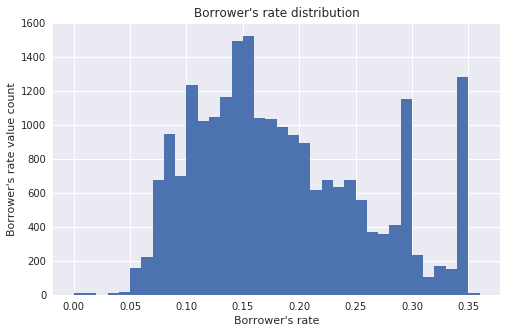

In [228]:
# We will start with an histogram plot of BorrowerRate
color= sb.color_palette()[0]
binsize = 0.01
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plot_hist(df,df['BorrowerRate'],bins,color,"Borrower's rate value count","Borrower's rate","Borrower's rate distribution")

We can take a closer look by reducing the bin size of the graph

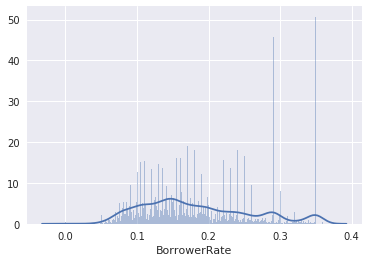

In [229]:
# We reduce the bin's size of the graphe
# Here we used the seaborn displot to obtain the line that helps to shape our view on the graph
color= sb.color_palette()[0]
binsize = 0.001
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)
sb.distplot( df['BorrowerRate'],bins=  bins, kde=True)

When we take a closer look, we can see that the borrower's rate seems to be following a normal distribution with many value concentrated between 0.1 and 0.2. We can observe 2 spikes on the right that seems to be outlier values.

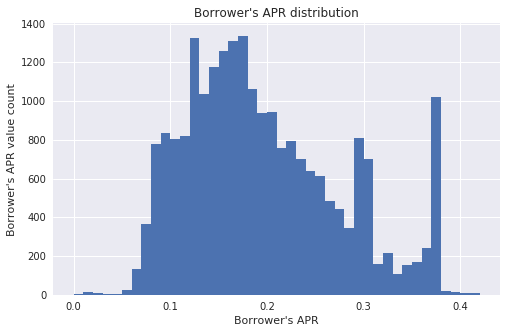

In [230]:
# Checking for APR
color= sb.color_palette()[0]
binsize = 0.01
bins = np.arange(0, df['BorrowerAPR'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plot_hist(df,df['BorrowerAPR'],bins,color,"Borrower's APR value count","Borrower's APR","Borrower's APR distribution")

Borrower's APR has a normal distribution with many value concentrated between 0.1 and 0.2

What is the distribution of other variables ?

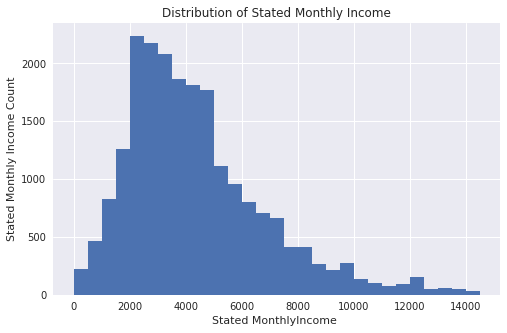

In [231]:
# Checking for Stated Monthly Income Distribution with the histogram plot
color= sb.color_palette()[0]
binsize = 1000
bins = np.arange(1, 15000, 500)
#plt.figure(figsize=[8, 5])
plot_hist(df,df['StatedMonthlyIncome'],bins,color,"Stated Monthly Income Count","Stated MonthlyIncome ","Distribution of Stated Monthly Income")

This distribution is a litle bit skewed on the right showing most of the borrowers make lest than 10000 a month

In [232]:
# Summary statistic of the Mothly income of borrowers
df['StatedMonthlyIncome'].describe()

count     22570.000000
mean       4626.533289
std        4440.716291
min           0.000000
25%        2500.000000
50%        3833.333333
75%        5695.833333
max      208333.333333
Name: StatedMonthlyIncome, dtype: float64

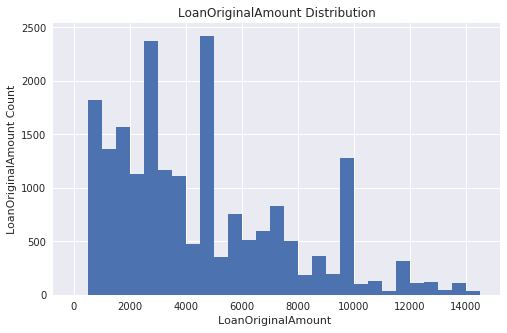

In [233]:
# Checking for for LoanOriginalAmount Distribution
color= sb.color_palette()[0]
binsize = 100
bins = np.arange(1, 15000, 500)
plot_hist(df,df['LoanOriginalAmount'],bins,color,"LoanOriginalAmount Count","LoanOriginalAmount ","LoanOriginalAmount Distribution")

The Distribution looks skewed on the right insinuating majority loan amount is below 8 000. However, we can perform some transformation for a deep view of this distribution

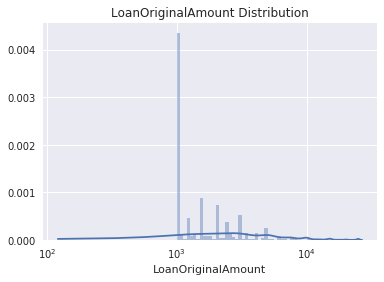

In [234]:
# Applygin transformation on LoanOriginalAmount Distribution
color= sb.color_palette()[0]
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.xscale('log')
plt.title('LoanOriginalAmount Distribution')
sb.distplot( df['LoanOriginalAmount'], bins = bins, kde=True)

#plot_hist(df,df['LoanOriginalAmount'],bins,color,"Stated Monthly Income Count","Stated MonthlyIncome ","Distribution of Stated Monthly Income")

As we can observe, after applying a logarithmic transformation, the LoanOriginalAmount Distribution looks normal with an extra spike on the left, which is probabily an outlier.

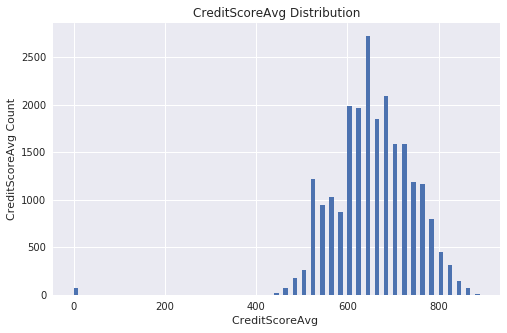

In [235]:
# Checking for CreditScoreAvg Distribution
color= sb.color_palette()[0]
binsize = 10
bins = np.arange(0, df['CreditScoreAvg'].max()+binsize, binsize)
plot_hist(df,df['CreditScoreAvg'],bins,color,"CreditScoreAvg Count","CreditScoreAvg ","CreditScoreAvg Distribution")

This distribution is a normal distribution falling symmetrically around the mean (700)

Text(0.5,1,'Categories of listing borrower selected when posting their listing')

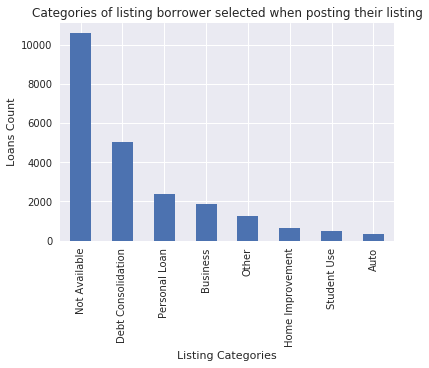

In [236]:
# By using a bar chart, we can check for the variable listing category distribution since this is a categorical variable
color= sb.color_palette()[0]
x= df['ListingCategory'].value_counts(sort=True, ascending=False)
x.plot(kind='bar',color = color)
plt.xlabel('Listing Categories')
plt.ylabel('Loans Count')
plt.title('Categories of listing borrower selected when posting their listing')

We can see that most of the loans either have no listing category or belong to Debt Consolodidation

Text(0.5,1,'Distribution of loans by States')

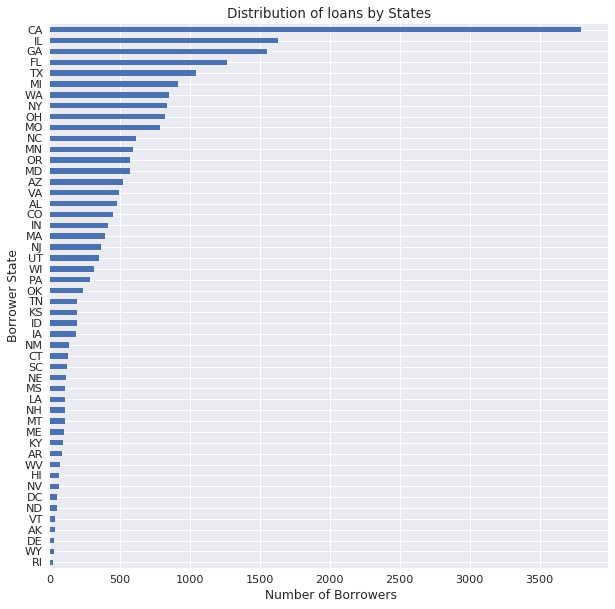

In [237]:
# By using a bar chart, we can check for the distribution of loans by state since this is a categorical variable
color= sb.color_palette()[0]
x= df['BorrowerState'].value_counts(sort=True, ascending=True)
plt.figure(figsize=(10, 10))
sb.set(style="darkgrid")
sb.set(font_scale=1.12)
x.plot(kind='barh',color = color)
plt.xlabel(' Number of Borrowers')
plt.ylabel('Borrower State')
plt.title('Distribution of loans by States')

We can see that most of the borrowers come from California and illinois State

In [238]:
#Ploting other categorical variables together
def Plot_others(x,title,h_alignment):    
    '''This function take the variable's name,
    the title and the horizontal allignment
    to plot the corresponding bar chart
    '''
 
    total = float(len(df))
    default_color = sb.color_palette()[0]
    # Set font size to 1 for better view
    sb.set(font_scale=1)

    ax = sb.countplot(data = df, x = x, color = default_color)
    plt.title(title)
    # Calculating the percentage of each value to annotate each bar since this is more informative for a viewer
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()+55
        ax.annotate(percentage, (x, y), ha=h_alignment)
    plt.show()

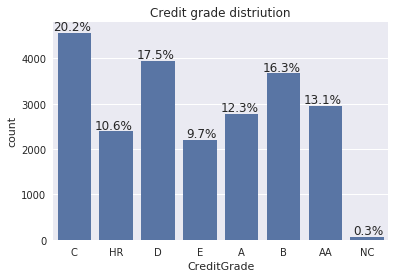

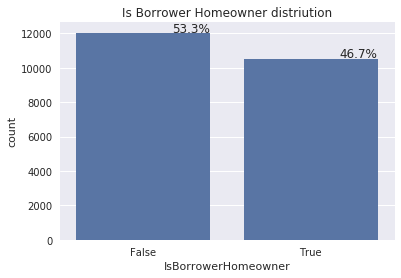

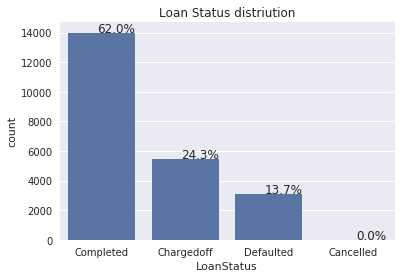

In [239]:
# Bar chart for CreditGrade
Plot_others('CreditGrade','Credit grade distriution','right')

# Bar chart for IsBorrowerHomeowner
Plot_others('IsBorrowerHomeowner','Is Borrower Homeowner distriution','right')

# Bar chart for LoanStatus
Plot_others('LoanStatus','Loan Status distriution','right')

From the above graphs we can see that 62% of the loans are compleated while 13.7% is defaulted on the other hands, C grade majored representing 20 % of the loans grade and 53.3 % of borrowers are home owners.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The BorrowerRate and BorrowerAPR are following a normal distribution with two spike values on the right. We had to reduce the bin size and use a line over the graph to have a better understanding of it.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the BorrowerRate and the stated monthly income, the distribution looked skewed. So, When we took a closer look by reducing the size of the bins, we could see that the borrower's rate and Borrower's APR seem to be following a normal distribution with many values concentrated between 0.1 and 0.2. We can observe two spikes on the right which are probably outliers. 
> Also, LoanOriginalAmount Distribution had an unusual distribution.  We performed a logarithmic transformation to see the distribution closer, which looks like a  normal distribution.

## Bivariate Exploration

 For a deep understanding of our variables, we will move to the bivariate exploration by trying to find correlations between pairs of variables. We can start by finding the pair with the strongest correlation among numeric variables using a heatmap graph. 

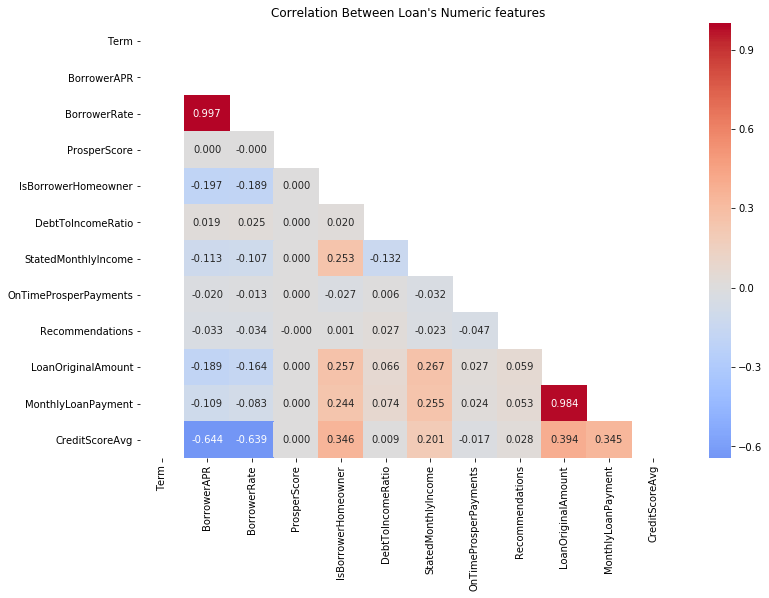

In [5]:
# Using a heatmap plot, We look for the pair with the strongest correlation among numeric variables
mask = np.zeros_like(df.corr(), dtype=np.bool)
plt.figure(figsize=(12, 8))
mask[np.triu_indices_from(mask)] = True
sb.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = 'coolwarm', center = 0, mask=mask)
plt.title("Correlation Between Loan's Numeric features");

From the heatmap plot, there is a strong positive correlation between BorrowerAPR and BorrowerRate, then between LoanOriginalAmount and MonthlyLoanPayment. On the other hand, the CreditScoreAVG negatively correlate with BorrowerAPR and BorrowerRate. This means the higher the borrower's credit score, the lower his loan's rate and annual percentage rate.

Text(0.5,0,'BorrowerAPR')

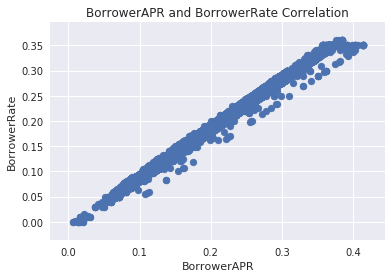

In [241]:
# Based on the previous observation we take a closer look between the BorrowerAPR and BorrowerRate 
# with a scatter plot since these are two numeric variables.
plt.scatter(data=df, y='BorrowerRate', x='BorrowerAPR')
plt.title('BorrowerAPR and BorrowerRate Correlation')
plt.ylabel('BorrowerRate')
plt.xlabel('BorrowerAPR')

Text(0.5,0,'LoanOriginalAmount')

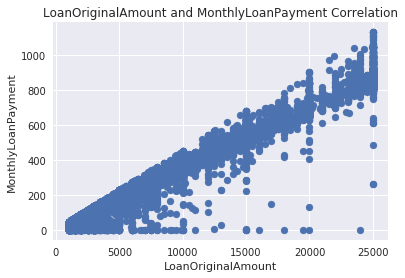

In [242]:
# Based on the previous observation we take a closer look between the MonthlyLoanPayment and LoanOriginalAmount 
# with a scatter plot since these are two numeric variables.
plt.scatter(data=df, y='MonthlyLoanPayment', x='LoanOriginalAmount')
plt.title('LoanOriginalAmount and MonthlyLoanPayment Correlation')
plt.ylabel('MonthlyLoanPayment')
plt.xlabel('LoanOriginalAmount')

We can see from this observation that the more the Loan original amount increase, the more the monthly payment increases and this logically makes sense. A  person that borrows 10 000 is expected to make a high monthly payment compared to someone with a 2000 loan.

Text(0.5,0,'CreditScoreAvg')

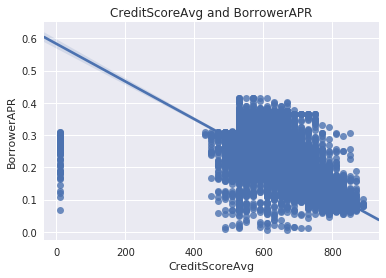

In [243]:
# Based on the previous observation we take a closer look between the BorrowerAPR and CreditScoreAvg 
# with a Regression plot plot since these are two numeric variables.
sb.regplot(data=df, y='BorrowerAPR', x='CreditScoreAvg')
plt.title('CreditScoreAvg and BorrowerAPR')
plt.ylabel('BorrowerAPR')
plt.xlabel('CreditScoreAvg')

We can observe that there is a negative correlation between CreditScoreAvg and BorrowerAPR. This means the more a borrower has a high Credit Score, the less he will spend on his loan. This is absolutely logic.

Now let us look at other correlations between numerical and categorical variables. 
We start by defining a function for pluting our violinplot since we are are going to plot a unch of it.

In [244]:
def plot_violin(x_,y_, title, rot):
    '''This function takes a numerical variable y, 
    a categorical variable x, a rotational angle rot for x labels
    and a title then makes a violin plot.
    '''
    deft_color = sb.color_palette()[0]
    plt.figure(figsize = [12,6])
    plt.title(title)
    plt.xticks(rotation=rot)
    sb.violinplot(data=df, y=y_, x=x_, color = deft_color)

In [245]:
def plot_box(x_,y_, title, rot):
    '''This function takes a numerical variable y, 
    a categorical variable x, a rotational angle rot for x labels
    and a title then makes a box plot.
    '''
    deft_color = sb.color_palette()[0]
    plt.figure(figsize = [12,6])
    plt.title(title)
    plt.xticks(rotation=rot)
    sb.boxplot(data=df, y=y_, x=x_, color = deft_color)

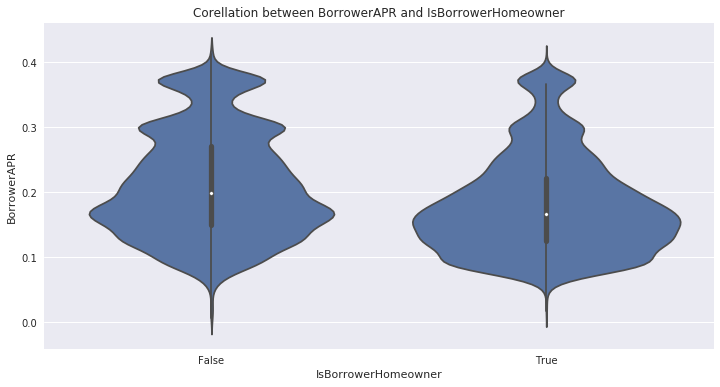

In [246]:
# Corellation between BorrowerAPR and IsBorrowerHomeowner
plot_violin('IsBorrowerHomeowner', 'BorrowerAPR', "Corellation between BorrowerAPR and IsBorrowerHomeowner",0 )

Homeowners have the smallest median. The shape of the distribution for homeowners (wide in the middle) indicates borrowers who own a house have an APR highly concentrated around the median.

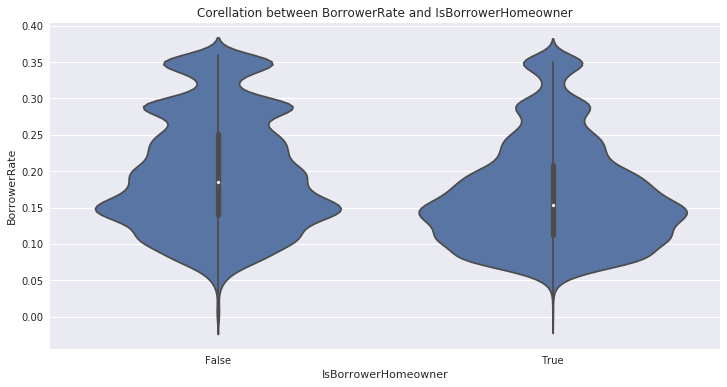

In [247]:
# Corellation between BorrowerRate and IsBorrowerHomeowner
plot_violin('IsBorrowerHomeowner', 'BorrowerRate', "Corellation between BorrowerRate and IsBorrowerHomeowner",0 )

This distribution is similar to that of BorrowerAPR and IsBorrowerHomeowner.

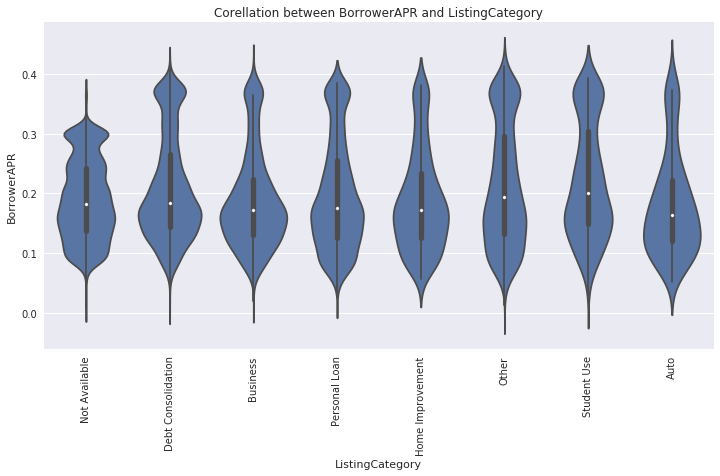

In [248]:
# Corellation between BorrowerAPR and ListingCategory

plot_violin('ListingCategory', 'BorrowerAPR', "Corellation between BorrowerAPR and ListingCategory",90 )

The median and the IQR vary depending on the purpose of the loan. From the graph, loan for Student  Use seems to have the highest APR median.

In [249]:
# We can investigate this further by calculating the median by ListingCategory
median_APR = df.groupby('ListingCategory', as_index=False)['BorrowerAPR'].median().sort_values(by='BorrowerAPR', ascending=False)
print(median_APR)

      ListingCategory  BorrowerAPR
7         Student Use      0.20082
5               Other      0.19361
2  Debt Consolidation      0.18436
4       Not Available      0.18224
6       Personal Loan      0.17626
3    Home Improvement      0.17219
1            Business      0.17181
0                Auto      0.16461


This Graph shows us that loan for student Use has the highest median (0.20) with a wide interquartile range. 

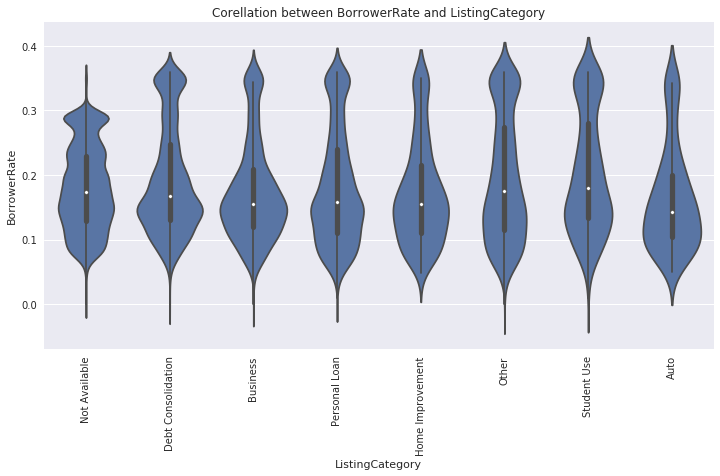

In [250]:
# Corellation between BorrowerRate and ListingCategory

plot_violin('ListingCategory', 'BorrowerRate', "Corellation between BorrowerRate and ListingCategory",90 )

In [251]:
# We can investigate this further by calculating the median by ListingCategory
median_APR = df.groupby('ListingCategory', as_index=False)['BorrowerRate'].median().sort_values(by='BorrowerRate', ascending=False)
print(median_APR)

      ListingCategory  BorrowerRate
7         Student Use       0.18000
5               Other       0.17475
4       Not Available       0.17400
2  Debt Consolidation       0.16800
6       Personal Loan       0.15750
1            Business       0.15500
3    Home Improvement       0.15500
0                Auto       0.14300


We can observe here that the Correlation between BorrowerRate and ListingCategory seems to be following the same distribution as the one between BorrowerAPR and ListingCategory. This is logical since BorrowerRate and BorrowerAPR are strongly Correlated.
The student use still has the highest median 0.18 which is below that the APR median of the same listing category.

Since we have many values for the BorrowerState variable, we will go for a box plot to find the correlation between it and our variables of interest.

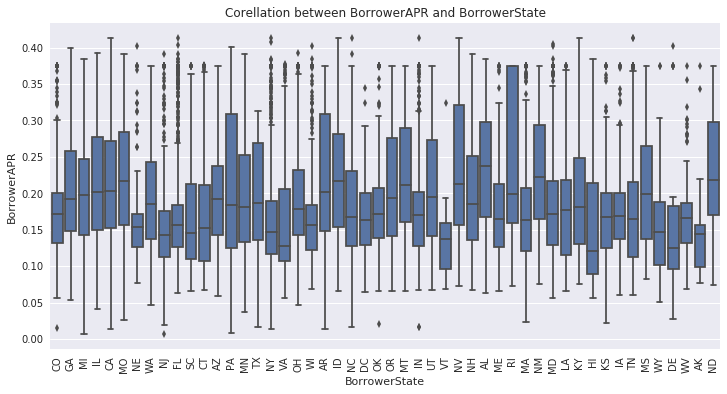

In [253]:
# Corellation between BorrowerAPR and BorrowerState

plot_box('BorrowerState','BorrowerAPR','Corellation between BorrowerAPR and BorrowerState',90)

A remarkable point here is that people in ALABAMA State (AL) have the highest APR median (0.24). This means the middle 50 % of people in this State pay more for a loan as compared to the 50 % of people in other states. On the other hand, Rhode Island State (RI) has the widest IQR and has the highest incurred cost of a loan as compared to all other States. We can also notice alot of outliers for the FL, NJ, NY, WI states.

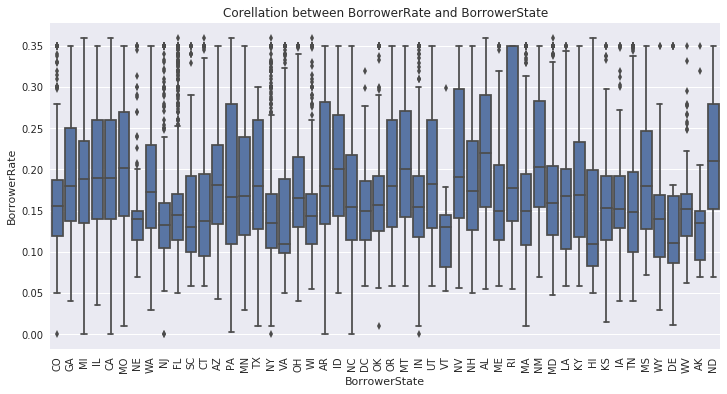

In [254]:
# Corellation between BorrowerRate and BorrowerState

plot_box('BorrowerState','BorrowerRate','Corellation between BorrowerRate and BorrowerState',90)

This correlation seems to follow the same distribution as the previous one.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The BorrowerAPR and BorrowerRate have a strong positive correlation, meanwhile BorrowerAPR and CreditScoreAvg show a strongly negative correaltion. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was also interesting relationship between LoanOriginalAmount and MonthlyLoanPayment. They had a strongly positive correlation. Also, BorrowerAPR and Borrower Rate have bigger mode for Student Use loans.

## Multivariate Exploration


Let us start by looking for the Relationship between BorrowerRate, StatedMonthlyIncome and IsBorrowerHomeowner

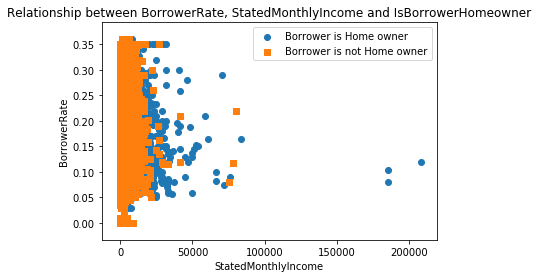

In [14]:
homeowner = [[True, 'o'],[False, 's']]

for cat, marker in homeowner:
    df_home = df[df['IsBorrowerHomeowner'] == cat]
    plt.scatter(data = df_home, x = 'StatedMonthlyIncome', y = 'BorrowerRate', marker = marker)
    plt.legend(['Borrower is Home owner','Borrower is not Home owner'])
    plt.ylabel('BorrowerRate')
    plt.xlabel('StatedMonthlyIncome')
    plt.title('Relationship between BorrowerRate, StatedMonthlyIncome and IsBorrowerHomeowner')

We can observe from this plotting that whether a borrower is a homeowner or not, this does not affect the BorrowerRate. However, we can see that people with homes tend to have a high monthly income.

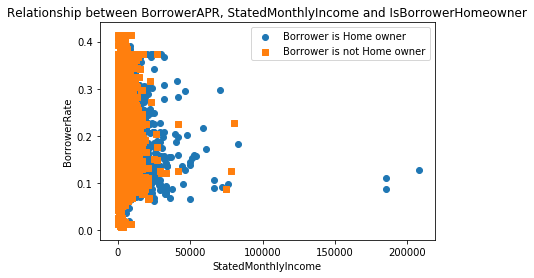

In [13]:
homeowner = [[True, 'o'],[False, 's']]

for cat, marker in homeowner:
    df_home = df[df['IsBorrowerHomeowner'] == cat]
    plt.scatter(data = df_home, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', marker = marker)
    plt.legend(['Borrower is Home owner','Borrower is not Home owner'])
    plt.ylabel('BorrowerRate')
    plt.xlabel('StatedMonthlyIncome')
    plt.title('Relationship between BorrowerAPR, StatedMonthlyIncome and IsBorrowerHomeowner')

This plot seems to be following the same trend as the previous plot. However, here we can observe that people without a house have higher APR means they tend to endure higher annual costs for a loan.

Text(0.5,0.98,'Credit grade and ListingCategory related to BorrowerAPR and CreditScoreAvg')

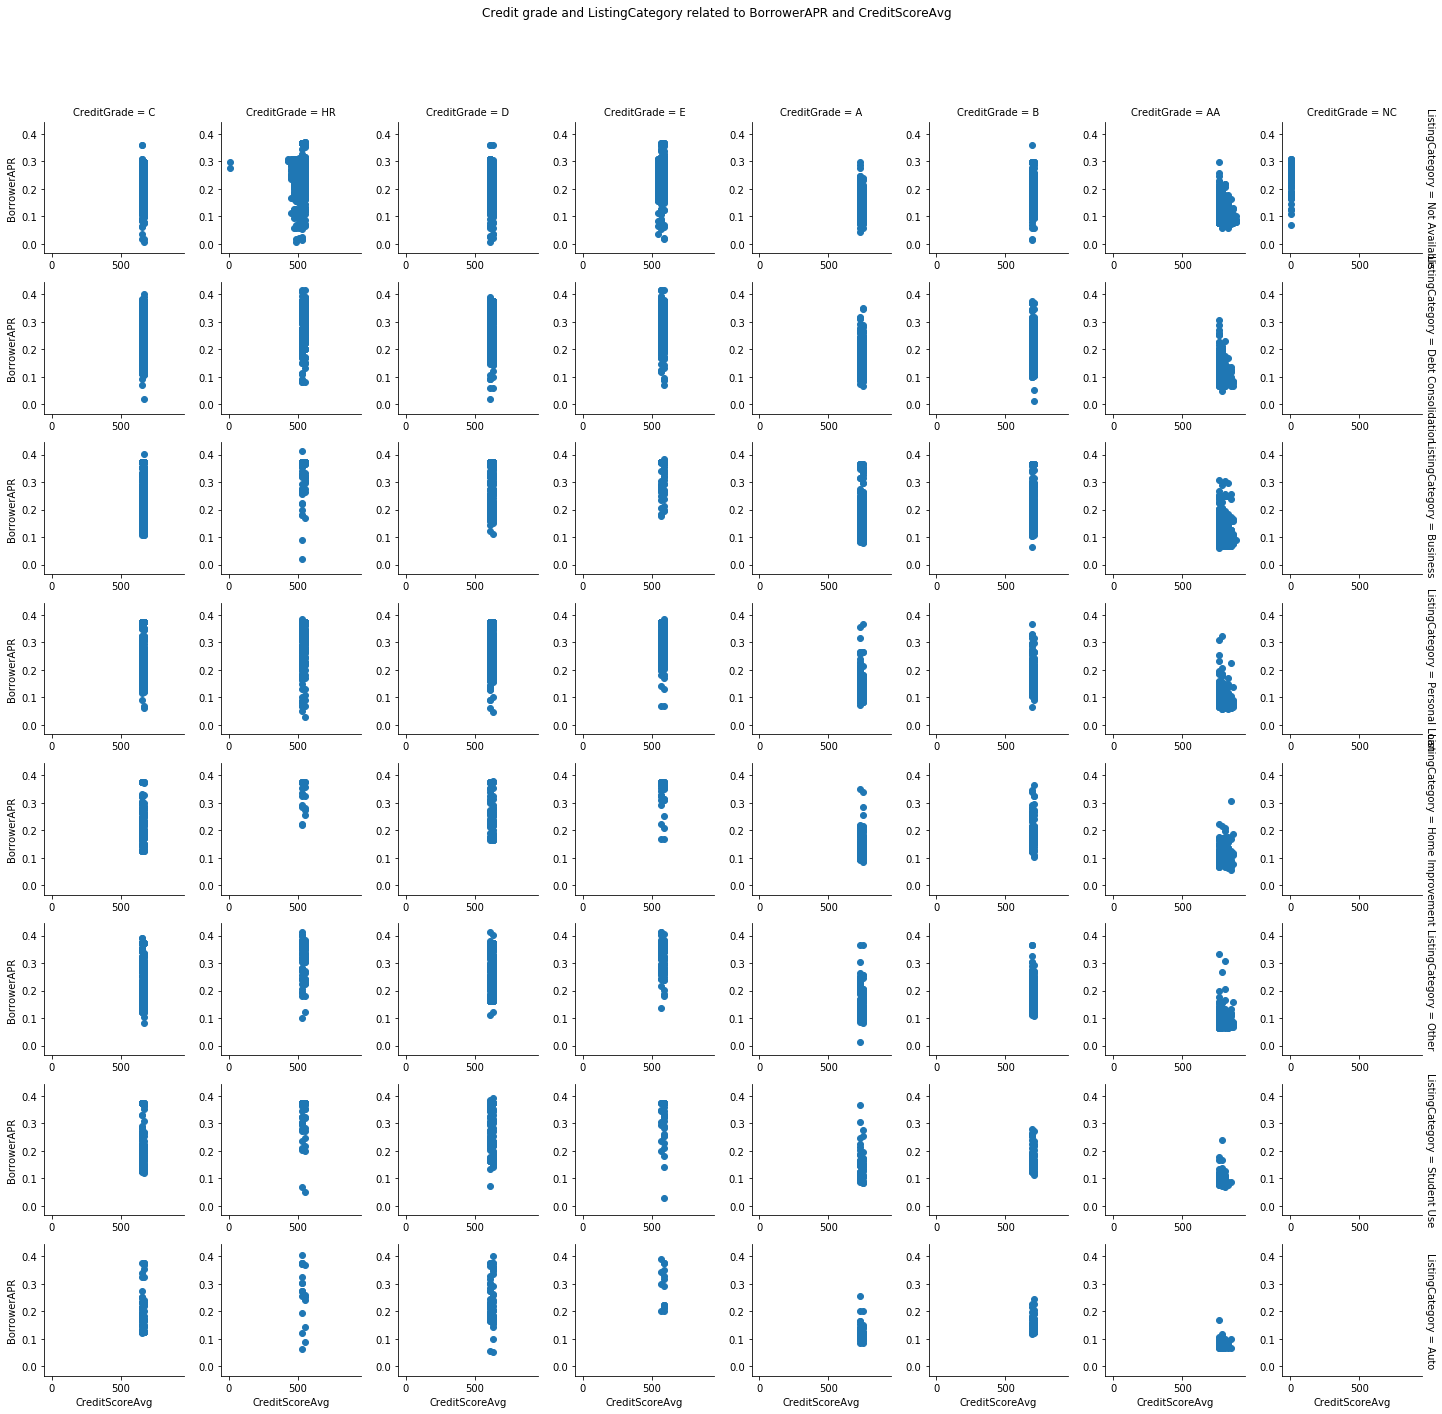

In [22]:
# Now let us look at different aspect of the Credit grade and ListingCategory related to BorrowerAPR and CreditScoreAvg
g = sb.FacetGrid(data = df, col = 'CreditGrade', row = 'ListingCategory', size = 2.5,
margin_titles = True)
g.map(plt.scatter, 'CreditScoreAvg','BorrowerAPR'  )
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Credit grade and ListingCategory related to BorrowerAPR and CreditScoreAvg')

Here, we can observe some interesting facts about people with credit grade AA. People with this credit grade borrowing money for Auto mobile purpose tend to have lower APR, consequently induring lower annual cost for loans.

Text(0.5,0.98,'Credit grade and EmploymentStatus related to BorrowerAPR and CreditScoreAvg')

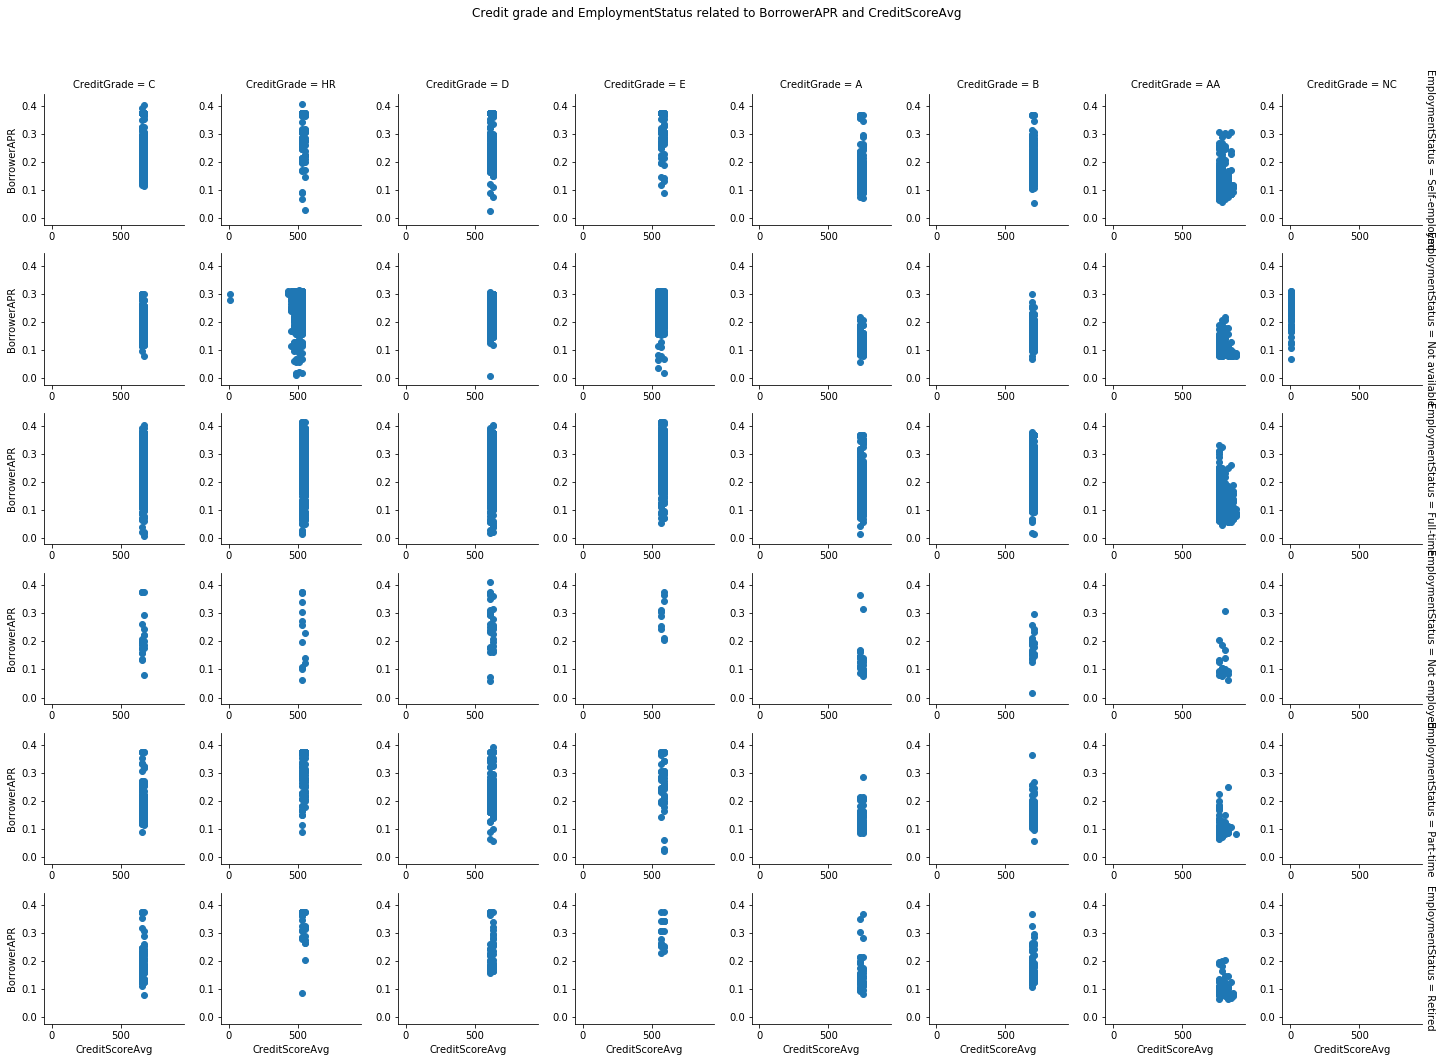

In [30]:
# Now let us look at different aspect of the Credit grade and EmploymentStatus related to BorrowerAPR and CreditScoreAvg
g = sb.FacetGrid(data = df, col = 'CreditGrade', row = 'EmploymentStatus', size = 2.5,
margin_titles = True)
g.map(plt.scatter, 'CreditScoreAvg','BorrowerAPR'  )
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Credit grade and EmploymentStatus related to BorrowerAPR and CreditScoreAvg')

From this plot, we can observe that people with full-time employment status tend to have high BorrowerAPR no matter what is their Credit Grade.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5,0.98,'EmploymentStatus and ListingCategory influence on BorrowerAPR')

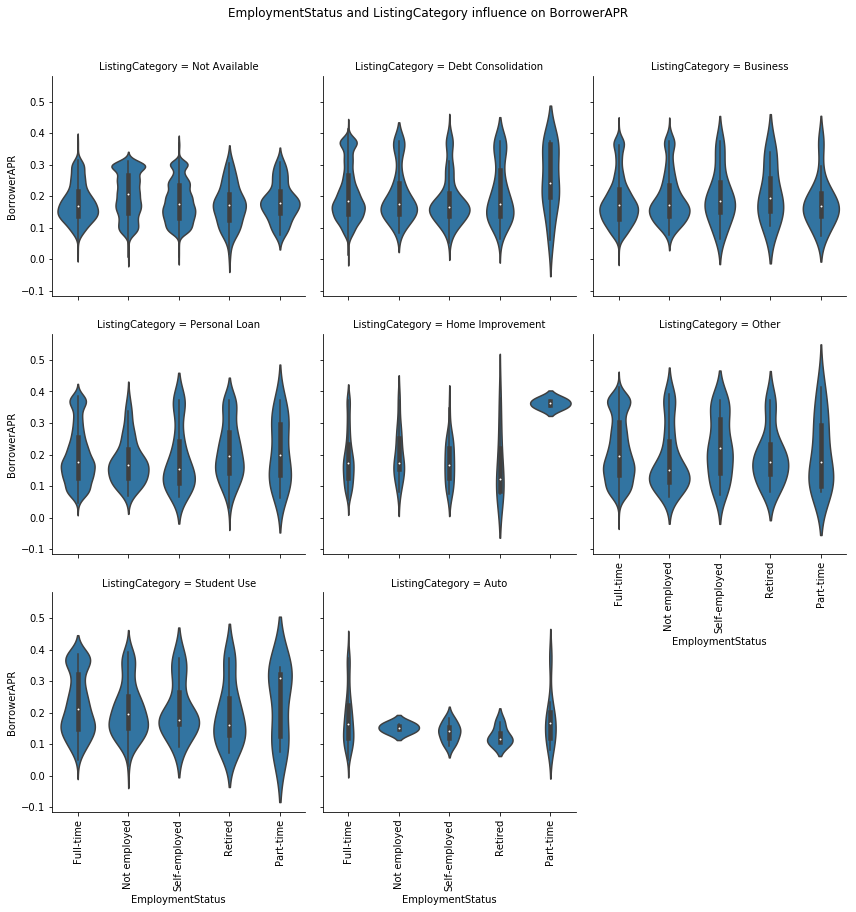

In [43]:
# Now let us look how EmploymentStatus and ListingCategory affect the BorrowerAPR
g = sb.FacetGrid(data = df, col = 'ListingCategory', size = 4,col_wrap = 3, margin_titles = True)
g.map(sb.violinplot, 'EmploymentStatus', 'BorrowerAPR')
g.fig.subplots_adjust(top=0.9)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.suptitle('EmploymentStatus and ListingCategory influence on BorrowerAPR')

From this plot, we can see that part-timer in many listing category seems to have higher APR (AUto, Student use, Home improvement, Debt consolidation).

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5,0.98,'EmploymentStatus and ListingCategory influence on BorrowerRate')

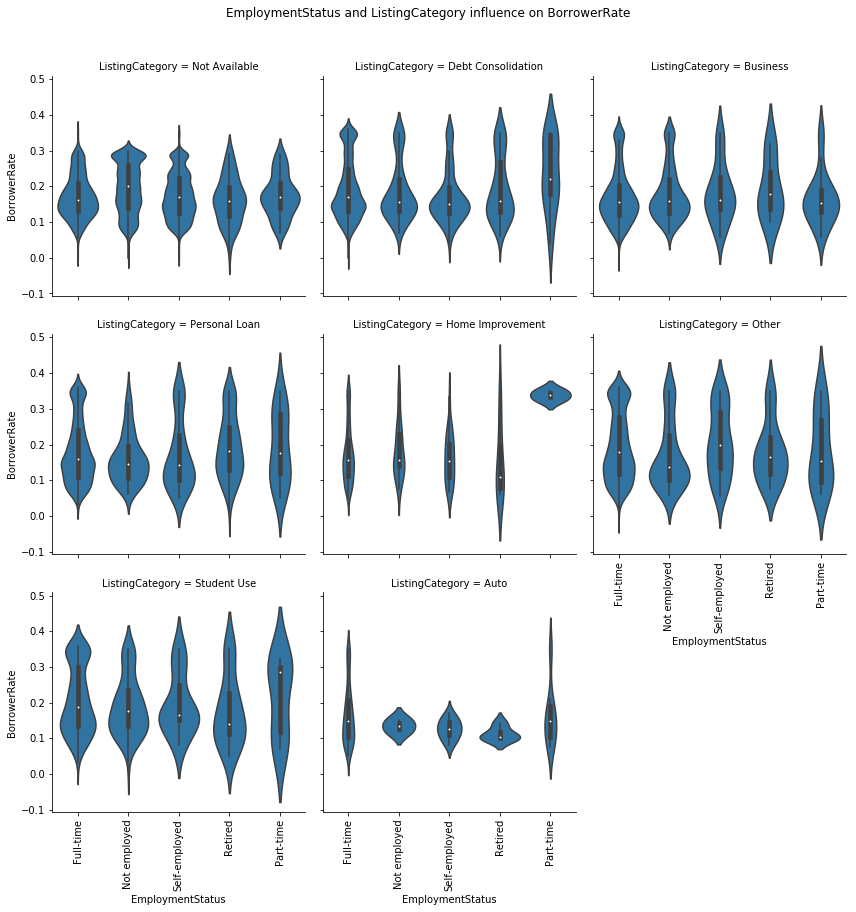

In [45]:
# Now let us look how EmploymentStatus and ListingCategory affect the BorrowerRate
g = sb.FacetGrid(data = df, col = 'ListingCategory', size = 4,col_wrap = 3, margin_titles = True)
g.map(sb.violinplot, 'EmploymentStatus', 'BorrowerRate')
g.fig.subplots_adjust(top=0.9)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.suptitle('EmploymentStatus and ListingCategory influence on BorrowerRate')

The observation here it's the same as in the previous plot. On the other hand, retired people tend to have low APR and low Rates. As such,  retired endure lower costs on loans compared to part-timers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> retired people tend to have low APR and low Rates. As such,  retired endure lower costs on loans compared to part-timers.
> We also observed that whether a borrower is a homeowner or not, this does not affect the BorrowerRate. However, we can see that people with homes tend to have a high monthly income.
> People with credit grade AA borrowing money for Auto mobile purpose tend to have lower APR, consequently induring lower annual cost for loans.

### Were there any interesting or surprising interactions between features?

I was surprised to see that The observation here it's the same as in the previous plot. On the other hand, retired people tend to have low APR and low Rates. As such,  retired endure lower costs on loans compared to part-timers.

## Conclusions
To sum up, our analysis consisted to perform an exploratory and explicative visual analysis of the prosper loan dataset and  find out what factors affect a BorrowerAPR and  borrower’s interest rate (BorrowerRate).
We started our analysis with  113,937 records and  81 variables. After the Wrangling process we ended up with 22570 record and 19 variables.  Through this exploration, we discovered that most of the borrowers come from The California State, and we also find out that, the higher the Credit Score, the lower  the  BorrowerAPR and BorrowerRate. Also, retired people tend to have low APR and low rates, consequently, enduring lower costs on loans compared to part-timers.part-timers.
